## Importing essential libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset and understanding its content

In [32]:
df=pd.read_csv('netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [33]:
df.shape

(8790, 10)

In [34]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [37]:
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in']

In [38]:
df['director']=df['director'].replace('Not Given','Unknown')
df['country']=df['country'].replace('Not Given','Unknown')
print("New Director Value Counts:")
print(df['director'].value_counts().head())

print('\nNew Country Value Counts:')
print(df['country'].value_counts().head())

New Director Value Counts:
director
Unknown                   2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Name: count, dtype: int64

New Country Value Counts:
country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Unknown            287
Name: count, dtype: int64


## Converting the date added column into date

In [40]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month_name()
df['year_added']=df['date_added'].dt.year

In [10]:
df_movies = df[df['type'] == 'Movie'].copy()
df_tv = df[df['type'] == 'TV Show'].copy()

df_movies = df_movies[df_movies['duration'].str.contains('min', na=False)].copy()

df_movies['duration_int'] = df_movies['duration'].str.replace(' min', '', regex=False).astype(int)
df_movies.drop('duration', axis=1, inplace=True)
df_movies.rename(columns={'duration_int': 'duration_min'}, inplace=True)

df_tv = df_tv[df_tv['duration'].str.contains('Season', na=False)].copy()

df_tv['duration_int'] = df_tv['duration'].str.replace(' Seasons| Season', '', regex=True).astype(int)
df_tv.drop('duration', axis=1, inplace=True)
df_tv.rename(columns={'duration_int': 'duration_seasons'}, inplace=True)

df_processed = pd.concat([df_movies, df_tv])

print("Processed Movie Data Head:")
print(df_processed[df_processed['type'] == 'Movie'][['title', 'type', 'duration_min']].head())
print("\nProcessed TV Show Data Head:")
print(df_processed[df_processed['type'] == 'TV Show'][['title', 'type', 'duration_seasons']].head())

df = df_processed.copy()

Processed Movie Data Head:
                              title   type  duration_min
0              Dick Johnson Is Dead  Movie          90.0
3  Confessions of an Invisible Girl  Movie          91.0
4                           Sankofa  Movie         125.0
6                      The Starling  Movie         104.0
7   Motu Patlu in the Game of Zones  Movie          87.0

Processed TV Show Data Head:
                              title     type  duration_seasons
1                         Ganglands  TV Show               1.0
2                     Midnight Mass  TV Show               1.0
5     The Great British Baking Show  TV Show               9.0
17            Jailbirds New Orleans  TV Show               1.0
18  Crime Stories: India Detectives  TV Show               1.0


## Data Analysis

In [11]:
numeric=['duration_min','duration_seasons']
numeric_analysis=df[numeric].describe()
print(numeric_analysis)

       duration_min  duration_seasons
count   6126.000000       2664.000000
mean      99.584884          1.751877
std       28.283225          1.550622
min        3.000000          1.000000
25%       87.000000          1.000000
50%       98.000000          1.000000
75%      114.000000          2.000000
max      312.000000         17.000000


## Bar chart for top 10 directors

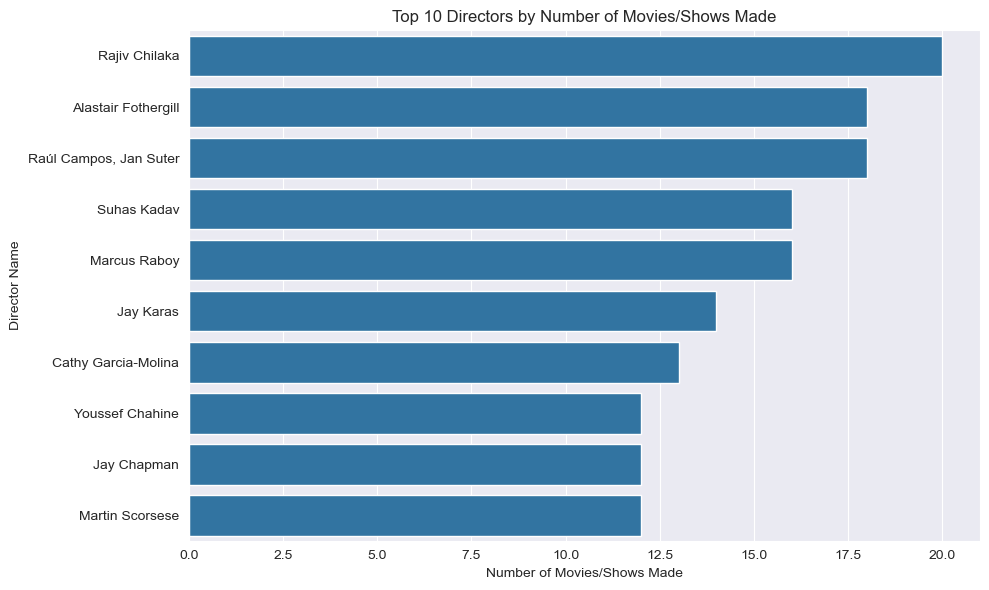

In [12]:

sns.set_style('darkgrid')
df_filtered=df[df['director']!='Unknown'].copy()
top_10_directors=df_filtered['director'].value_counts().head(10)


top_10_df=top_10_directors.reset_index()
top_10_df.columns=['Director','Count']

plt.figure(figsize=(10,6))
sns.barplot(data=top_10_df,
            x='Count',
            y='Director')

plt.title('Top 10 Directors by Number of Movies/Shows Made')
plt.xlabel('Number of Movies/Shows Made')
plt.ylabel('Director Name')

plt.tight_layout()
plt.show()

In [13]:
top_director_name=top_10_directors.index[0]
print(f'The top director is: {top_director_name}\n')

director_titles_df=df_filtered[df_filtered['director']==top_director_name]

titles_list=director_titles_df['title'].tolist()
print(f'Movies/Shows directed by {top_director_name}:')
print('\n')
for i,title in enumerate(titles_list,1):
    print(f'{i}.{title}')

The top director is: Rajiv Chilaka

Movies/Shows directed by Rajiv Chilaka:


1.Chhota Bheem: Bheem vs Aliens
2.Chhota Bheem - Neeli Pahaadi
3.Chhota Bheem & Ganesh
4.Chhota Bheem & Krishna: Mayanagari
5.Chhota Bheem & Krishna: Pataliputra- City of the Dead
6.Chhota Bheem And The Crown of Valhalla
7.Chhota Bheem And The Broken Amulet
8.Chhota Bheem aur Krishna
9.Chhota Bheem and the Incan Adventure
10.Chhota Bheem and The ShiNobi Secret
11.Chhota Bheem Aur Hanuman
12.Chhota Bheem aur Krishna vs Zimbara
13.Chhota Bheem: Dholakpur to Kathmandu
14.Chhota Bheem: Journey to Petra
15.Chhota Bheem: Master of Shaolin
16.Chhota Bheem: The Rise of Kirmada
17.Chhota Bheem and the Curse of Damyaan
18.Bheemayan
19.Dragonkala Ka Rahasya
20.Chhota Bheem


## Results:
- The top director is 'Rajiv Chilaka' with maximum no. of movies/shows present in Netflix, and all of them turns out to be part of a famous Indian Cartoon 'Chhota Bheem'.

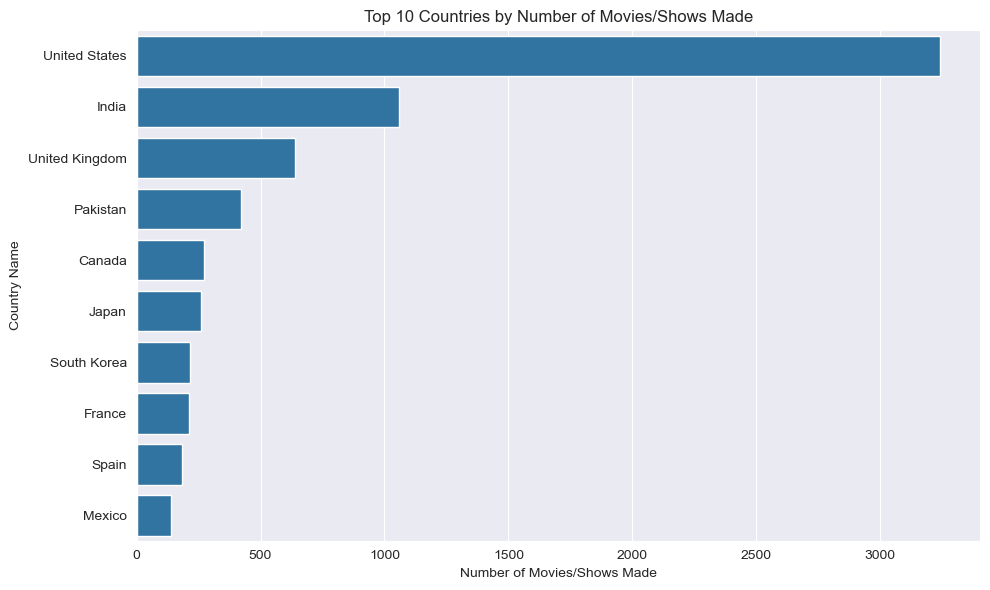

In [14]:
df_country_filtered=df[df['country']!='Unknown'].copy()

top_10_countries=df_country_filtered['country'].value_counts().head(10)
top_10_countries_df=top_10_countries.reset_index()
top_10_countries_df.columns=['Country','Count']

plt.figure(figsize=(10,6))
sns.barplot(data=top_10_countries_df,
            x='Count',
            y='Country')

plt.title('Top 10 Countries by Number of Movies/Shows Made')
plt.xlabel('Number of Movies/Shows Made')
plt.ylabel('Country Name')

plt.tight_layout()
plt.show()

## Insight:
- US and India tops the list with releasing/having maximum number of their content on Netflix.

In [15]:
## No. of total content produced by each country.

Country_counts=df_country_filtered['country'].value_counts()
Country_dataframe=Country_counts.reset_index()
Country_dataframe.columns=['Country','Counts']
print(Country_dataframe.to_markdown(index=False))

| Country              |   Counts |
|:---------------------|---------:|
| United States        |     3240 |
| India                |     1057 |
| United Kingdom       |      638 |
| Pakistan             |      421 |
| Canada               |      271 |
| Japan                |      259 |
| South Korea          |      214 |
| France               |      213 |
| Spain                |      182 |
| Mexico               |      138 |
| Egypt                |      123 |
| Australia            |      114 |
| Turkey               |      112 |
| Nigeria              |      105 |
| Germany              |      104 |
| China                |      100 |
| Brazil               |       88 |
| Indonesia            |       86 |
| Taiwan               |       86 |
| Philippines          |       83 |
| Hong Kong            |       79 |
| Argentina            |       76 |
| Italy                |       66 |
| Thailand             |       66 |
| Colombia             |       42 |
| South Africa         |    

## Insight: 
- The absolute number of shows/movies produced by each country is shown in the table above with US, India, UK, Pakistan and Canada being the top 5 countries.

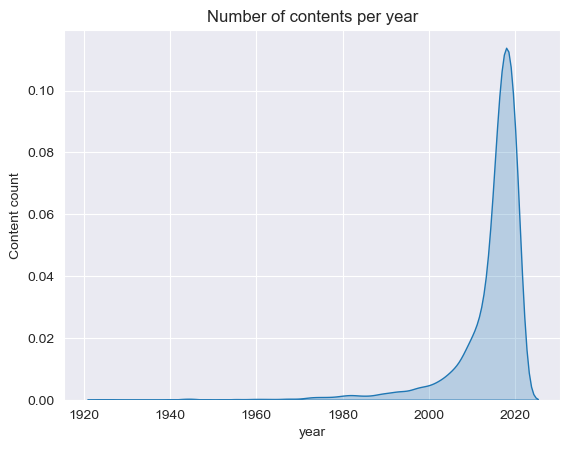

In [16]:
sns.kdeplot(data=df,
              x='release_year',
           fill=True)

plt.title('Number of contents per year')
plt.xlabel('year')
plt.ylabel('Content count')

plt.show()

## Insights: 
- Year by year Netflix is becoming more and more popular OTT platform and thus number of contents being released in the platform is also increasing.
- From 2000 it started increasing, have a certain downfall around 2020 (covid year) but maximum content present on Netflix turns out to be released in 2000s only.

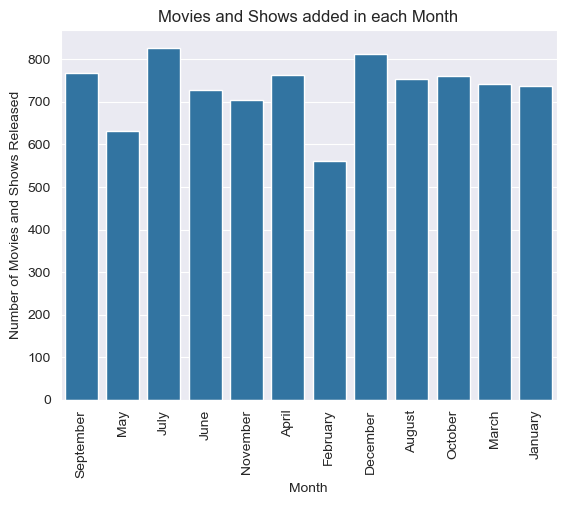

In [17]:
sns.countplot(data=df,x='month_added')
plt.title('Movies and Shows added in each Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies and Shows Released')
plt.xticks(rotation=90)
plt.show()

## Insights:
- The bar graph shows the total no. of content added wach month.
- Feb having somewhat less number of contents release than all other months.
- All months have somewhat equal no. of contents release with little deviations.

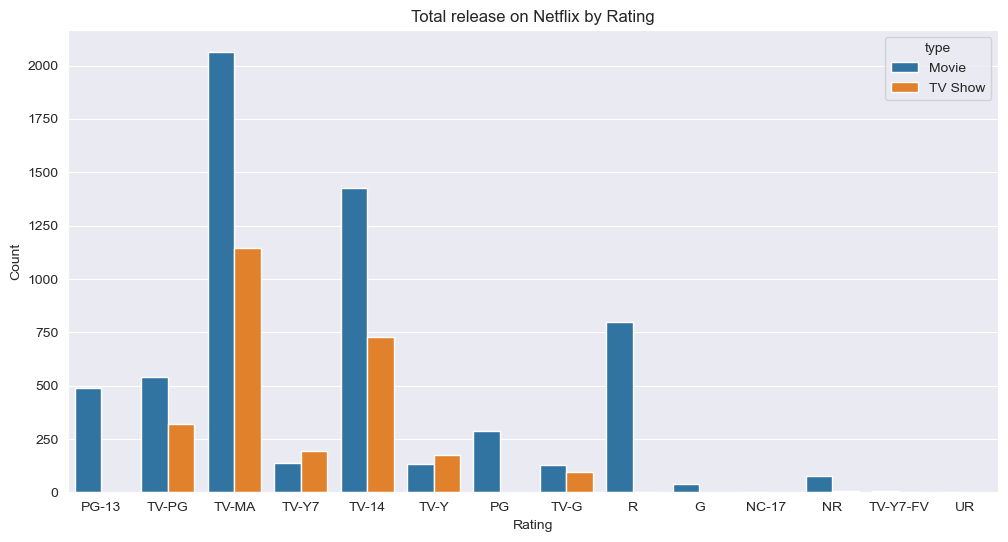

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,
              x='rating',
              hue='type')

plt.title('Total release on Netflix by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

## Insights:
- Maximum Movies and shows are released under adults rating.
- Ratings like those for children below 13, not rated, restricted for children below 17 have no TV Show releases.
- Other ratings have a less amount of contents release when compared to ratings for above 17.

Top 10 Most Frequent Genres:
genre
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

Crosstab Data (Top 10 Genres vs. Content Type):
type                      Movie  TV Show
genre                                   
International Movies       2752        0
Dramas                     2426        0
Comedies                   1674        0
International TV Shows        0     1349
Documentaries               869        0
Action & Adventure          859        0
TV Dramas                     0      762
Independent Movies          756        0
Children & Family Movies    641        0
Romantic Movies             616        0


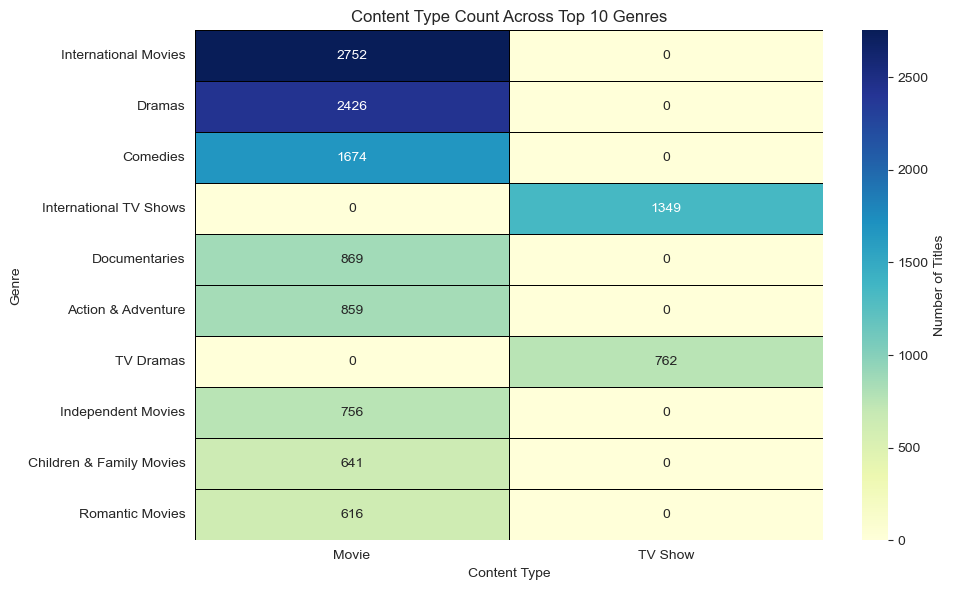

In [20]:
df_genre=df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')
df_genre.rename(columns={'listed_in':'genre'},inplace=True)

top_genres=df_genre['genre'].value_counts().head(10)
print("Top 10 Most Frequent Genres:")
print(top_genres)

genre_crosstab=pd.crosstab(df_genre['genre'],df_genre['type'])

top_10_genres_list=top_genres.index.tolist()
genre_type_heatmap_data=genre_crosstab.loc[top_10_genres_list]
genre_type_heatmap_data['Total']=genre_type_heatmap_data.sum(axis=1)
genre_type_heatmap_data.sort_values(by='Total',ascending=False,inplace=True)
genre_type_heatmap_data.drop('Total',axis=1,inplace=True)

print("\nCrosstab Data (Top 10 Genres vs. Content Type):")
print(genre_type_heatmap_data)

# --- 5. Visualization: Heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(genre_type_heatmap_data,
            annot=True,
            fmt='d',
            cmap='YlGnBu',
            linewidths=0.5,
            linecolor='black',
            cbar_kws={'label': 'Number of Titles'})

plt.title('Content Type Count Across Top 10 Genres')
plt.ylabel('Genre')
plt.xlabel('Content Type')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

## Insights:
- Most popular genres in movie turns out to be international,dramas,and comedy.
- TV shows are released only have 2 popular genres International, and TV Dramas.

C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_17060\4128164432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_tv_clean,


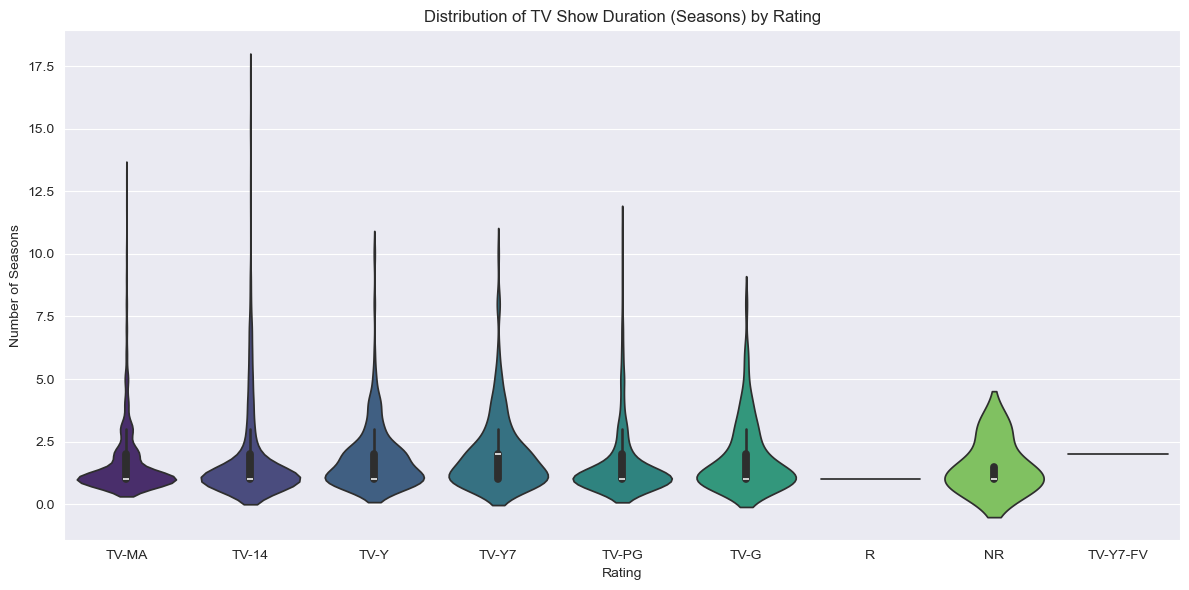

In [24]:
df_tv_clean=df_tv.copy()

plt.figure(figsize=(12,6))
sns.violinplot(data=df_tv_clean,
               x='rating',
               y='duration_seasons',
               palette='viridis')
plt.title('Distribution of TV Show Duration (Seasons) by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Seasons')
plt.tight_layout()
plt.show()

## Insights:
- Most TV Shows, regardless of rating, are very short.
- Shows for mature/teen audiences have the highest potential for long runs.

C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_17060\3134491854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_movie_clean,


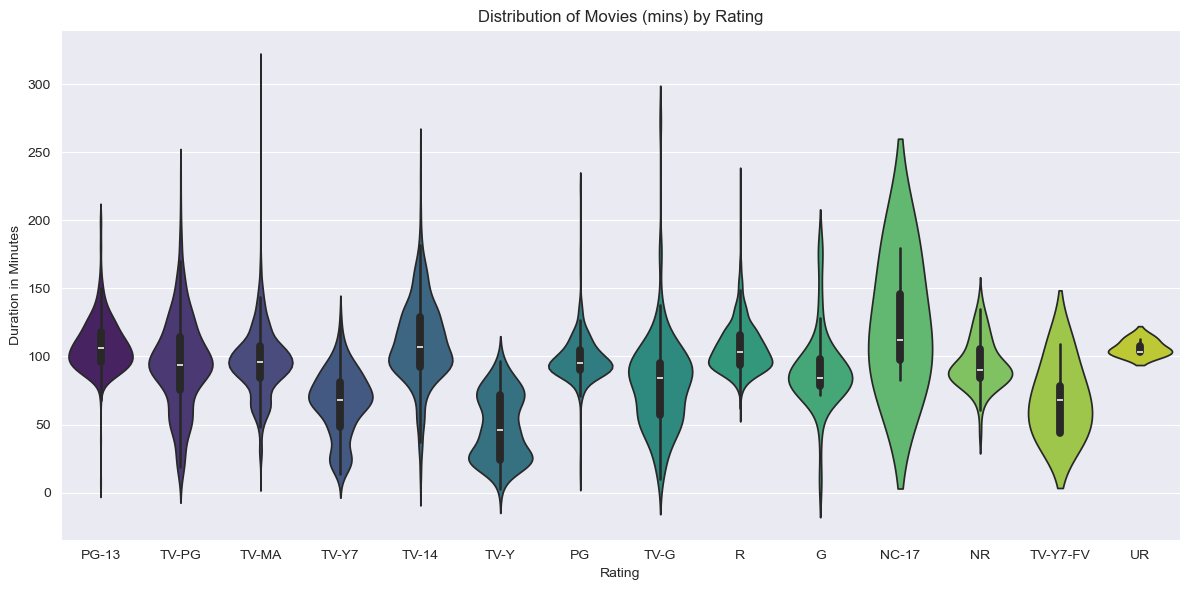

In [28]:
df_movie_clean=df_movies.copy()

plt.figure(figsize=(12,6))
sns.violinplot(data=df_movie_clean,
               x='rating',
               y='duration_min',
               palette='viridis')
plt.title('Distribution of Movies (mins) by Rating')
plt.xlabel('Rating')
plt.ylabel('Duration in Minutes')
plt.tight_layout()
plt.show()

## Insights:
- NC-17,R,TV-MA movies have the potential to be longest.
- Child ratings correspond to shorter avg. movie lengths.

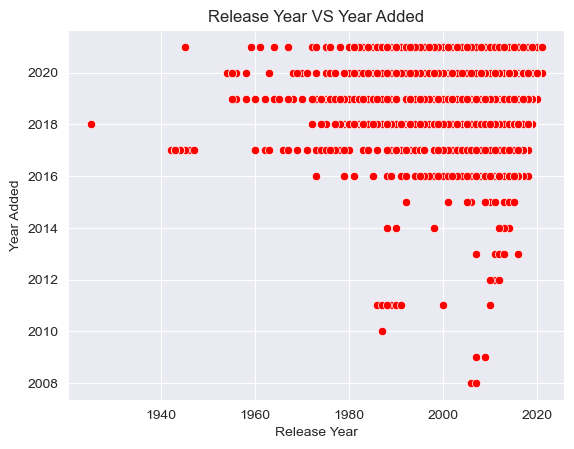

In [44]:
sns.scatterplot(data=df,
                x='release_year',
                y='year_added',
                color='red')

plt.xlabel('Release Year')
plt.ylabel('Year Added')
plt.title('Release Year VS Year Added')
plt.show()

## Insights:
- Most contents is both newly released and newly added.
- Acquistion volume exploded starting in 2016.
- Classics are a small exception.